<a href="https://colab.research.google.com/github/JimenezHAnaFer/SIMULACION-1/blob/main/Monte_Carlo_Crudo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Avance 1*

In [ ]:
import random as rd
import numpy as np
import matplotlib.pyplot as plt

# Definimos nuestra función
def f(x):
    return np.sqrt(np.arctan(x))

x = np.linspace(0, 1, 10)
y = f(x)

print(x)
print(y)

[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]
[0.         0.3326518  0.46762051 0.5672306  0.64670266 0.71210849
 0.76681328 0.81304561 0.85243319 0.88622693]


*Avance 2*

In [ ]:
import random as rd
import numpy as np
import matplotlib.pyplot as plt

# Definimos nuestra función
def g(x):
    return np.sqrt(np.arctan(x))
x = np.linspace(0, 1, 10000)
y = g(x)

# Método de Monte Carlo Crudo
def monte_carlo_crudo(n):
    suma = 0
    for _ in range(n):
        x = rd.random()
        suma += g(x)
    return suma / n  #1/N (suma de g(x_i))

# Estimación de la integral
n = 10000  # Número de muestras
estimacion = monte_carlo_crudo(n)
print('Estimacion de la integral con', n, 'muestras:', estimacion)

#Graficar la estimación de la integral


Estimacion de la integral con 10000 muestras: 0.633130653742788


# Monte Carlo Crudo


El método de Monte Carlo crudo es una técnica numérica probabilística para estimar integrales y resolver problemas matemáticos mediante muestreo aleatorio. Su nombre "crudo" (o "simple") proviene de su implementación directa sin técnicas de reducción de varianza.

# Metodología de Monte Carlo Crudo

## 1. Identificación de Variables
- **Variable de entrada**:
  Puntos aleatorios X_i ~ Uniforme(0,1) que sirven como abscisas para evaluar la función
- **Variable de salida**:
  Valor promedio de las evaluaciones g(X_i) que estima la integral

## 2. Distribución de Probabilidad
- **Distribución uniforme continua**:
  Todos los puntos X_i se generan con igual probabilidad en el intervalo [0,1]
- Justificación: Permite muestrear equitativamente todo el dominio de integración

## 3. Modelado de Variables Aleatorias
- **Mecanismo de generación**:
  Uso de generadores pseudoaleatorios (random.random())
- **Propiedad clave**:
  Los puntos son independientes e idénticamente distribuidos (i.i.d.)

## 4. Definición del Modelo del Sistema
- **Objetivo principal**:
  Estimar ∫₀¹ √(arctan(x)) dx mediante promedio de evaluaciones
- **Componentes del modelo**:
  - Función g(x) = √(arctan(x))
  - Mecanismo de muestreo uniforme
  - Operador de promedio simple

## 5. Diseño del Experimento
- **Configuración básica**:
  - Número de muestras
  - Rango de integración: [0,1]
- **Métricas de evaluación**:
  - Estimación puntual de la integral
  - Varianza de las estimaciones
  - Gráfica de convergencia

## 6. Ejecución y Análisis
- **Protocolo experimental**:
  1. Generar N puntos uniformes
  2. Evaluar g(x) en cada punto
  3. Calcular promedio de valores
  4. Repetir para diferentes N
- **Validación**:
  - Análisis de varianza

**Fundamentos Teóricos:**
- **Ley de Grandes Números**:
  Garantiza que el estimador converge al valor real
- **Teorema del Límite Central**:
  Explica la distribución normal del error
- **Propiedades de integración**:
  Base matemática del método de promedio


Estimacion de la integral con 1000 muestras: 0.624578499912733
0.0018865738624043676


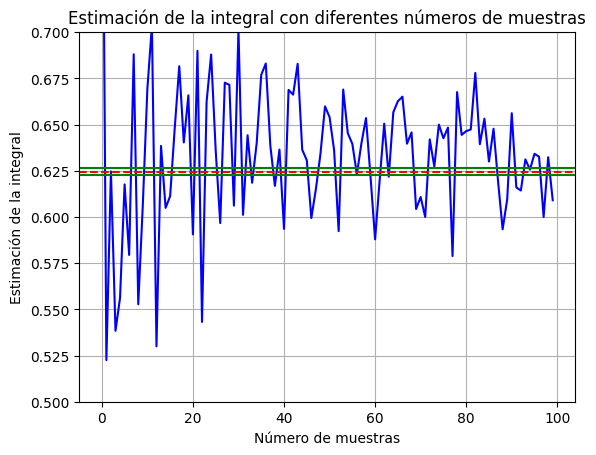

In [11]:
import random as rd
import numpy as np
import matplotlib.pyplot as plt

# Definimos nuestra función
def g(x):
    return np.sqrt(np.arctan(x))
x = np.linspace(0, 1, 10000)
y = g(x)

# Método de Monte Carlo Crudo
def monte_carlo_crudo(n):
    suma = 0
    for _ in range(n):
        x = rd.random()
        suma += g(x)
    return suma / n  #1/N (suma de g(x_i))

# Estimación de la integral
n = 1000  # Número de muestras
estimacion = monte_carlo_crudo(n)
print('Estimacion de la integral con', n, 'muestras:', estimacion)

#Definimos el experimento
def experimento(n):
    l=[]
    for i in range(1,n+1):
        l.append(monte_carlo_crudo(i))
    return l

l=experimento(100)
np.var(l)

print(np.var(l))
#Graficar la estimación de la integral
plt.plot(l, linestyle="-", color="b")
plt.xlabel("Número de muestras")
plt.ylabel("Estimación de la integral")
plt.title("Estimación de la integral con diferentes números de muestras")
plt.axhline(y=estimacion, color='r', linestyle='--')
plt.axhline(y=estimacion+np.var(l), color='g')
plt.axhline(y=estimacion-np.var(l), color='g')
plt.ylim([0.5, 0.7])
plt.grid(True)
plt.show()
